In [163]:
using PyCall
using StatsBase
using Plots

In [164]:
datasets = pyimport("sklearn.datasets")

PyObject <module 'sklearn.datasets' from 'C:\\Users\\javan\\.julia\\conda\\3\\x86_64\\lib\\site-packages\\sklearn\\datasets\\__init__.py'>

In [165]:
iris = datasets.load_iris()

Dict{Any, Any} with 8 entries:
  "feature_names" => ["sepal length (cm)", "sepal width (cm)", "petal length (c…
  "frame"         => nothing
  "target_names"  => PyObject array(['setosa', 'versicolor', 'virginica'], dtyp…
  "data"          => [5.1 3.5 1.4 0.2; 4.9 3.0 1.4 0.2; … ; 6.2 3.4 5.4 2.3; 5.…
  "filename"      => "iris.csv"
  "target"        => Int32[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  2, 2, 2, 2, 2, 2, 2…
  "DESCR"         => ".. _iris_dataset:\n\nIris plants dataset\n---------------…
  "data_module"   => "sklearn.datasets.data"

In [166]:
iris["target"]

150-element Vector{Int32}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2

In [227]:
data = iris["data"]

150×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮              
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

In [242]:
function fit_data(data_points, data_cluster, num_clusters, num_iterations)
    μₗ = vcat(maximum(data_points, dims=1), mean(data_points, dims=1), minimum(data_points, dims=1))
    for i=1:num_iterations
        loss = 0.
        for k=1:size(data_points)[1]
            point = data_points[k, 1:end]'
            l = findmin(sum((μₗ .- point).^2, dims=2))[2][1]
            loss += sum((μₗ[l, 1:end] .- point).^2)
            data_cluster[k] = l
        end
        μₗ = mean.([data_points[data_cluster .== j, 1:end] for j=1:num_clusters], dims=1)
        μₗ = vcat(μₗ[1], μₗ[2], μₗ[3])
    end
    return μₗ, data_cluster
end

fit_data (generic function with 1 method)

In [243]:
data_points = data[1:end, 1:2:4]

150×2 Matrix{Float64}:
 5.1  1.4
 4.9  1.4
 4.7  1.3
 4.6  1.5
 5.0  1.4
 5.4  1.7
 4.6  1.4
 5.0  1.5
 4.4  1.4
 4.9  1.5
 5.4  1.5
 4.8  1.6
 4.8  1.4
 ⋮    
 6.0  4.8
 6.9  5.4
 6.7  5.6
 6.9  5.1
 5.8  5.1
 6.8  5.9
 6.7  5.7
 6.7  5.2
 6.3  5.0
 6.5  5.2
 6.2  5.4
 5.9  5.1

In [244]:
data_clusters = zeros(Int, size(data_points)[1])

150-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [246]:
centers, cluster_index= fit_data(data_points, data_clusters, 3, 1000)

([6.839024390243902 5.678048780487804; 5.8741379310344835 4.393103448275863; 5.007843137254902 1.4921568627450978], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [263]:
cluster1 = data_points[cluster_index .== 1, 1:end]'
center1 = centers[1, 1:end]

2-element Vector{Float64}:
 6.839024390243902
 5.678048780487804

In [264]:
cluster2 = data_points[cluster_index .== 2, 1:end]'
center2 = centers[2, 1:end]

2-element Vector{Float64}:
 5.8741379310344835
 4.393103448275863

In [265]:
cluster3 = data_points[cluster_index .== 3, 1:end]'
center3 = centers[3, 1:end]

2-element Vector{Float64}:
 5.007843137254902
 1.4921568627450978

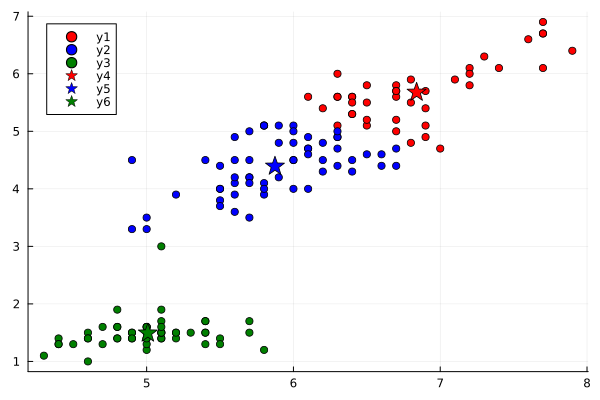

In [273]:
scatter(cluster1[1, :], cluster1[2, :], c="red")
scatter!(cluster2[1, :], cluster2[2, :], c="blue")
scatter!(cluster3[1, :], cluster3[2, :], c="green")
scatter!(center1[1,:], center1[2,:], c="red", markershape=:star, markersize=10)
scatter!(center2[1,:], center2[2,:], c="blue", markershape=:star, markersize=10)
scatter!(center3[1,:], center3[2,:], c="green", markershape=:star, markersize=10)